In [1]:
import numpy as np
import healpy as hp
from healpy.newvisufunc import projview
from astropy.table import Table

import matplotlib
from matplotlib import pyplot as plt

In [2]:
matplotlib.rcParams['ytick.labelsize'] = 18
matplotlib.rcParams['xtick.labelsize'] = 18
matplotlib.rcParams['axes.labelsize'] = 22
matplotlib.rcParams['legend.fontsize'] = 18

matplotlib.rc('text', usetex=True)

In [3]:
cmap_map = 'plasma'

## Load data from local machine

In [27]:
fn_gcatlo = f'../data/quaia_G20.0.fits'
fn_gcathi = f'../data/quaia_G20.5.fits'

fn_sello = f"../data/maps/selection_function_NSIDE64_G20.0.fits"
fn_selhi = f"../data/maps/selection_function_NSIDE64_G20.5.fits"

fn_randlo = f'../data/randoms/random_G20.0_10x_retry.fits'
fn_randhi = f'../data/randoms/random_G20.5_10x_retry.fits'

## Parameters

In [28]:
NSIDE = 64
NPIX = hp.nside2npix(NSIDE)

In [29]:
name_catalog = '\emph{{Gaia}}-\emph{{unWISE}} Quasar Catalog'
abbrv_catalog = 'Quaia'

In [30]:
G_hi = 20.5
G_lo = 20.0

In [31]:
# for plotting purposes
fac_stdev = 1.5

In [32]:
tab_gcathi = Table.read(fn_gcathi)
N_gcathi = len(tab_gcathi)
print(f"Number of data sources: {N_gcathi}")

Number of data sources: 1295502


In [45]:
map_selhi = hp.read_map(fn_selhi)
print(np.min(map_selhi), np.max(map_selhi))

0.0 0.9613862831064095


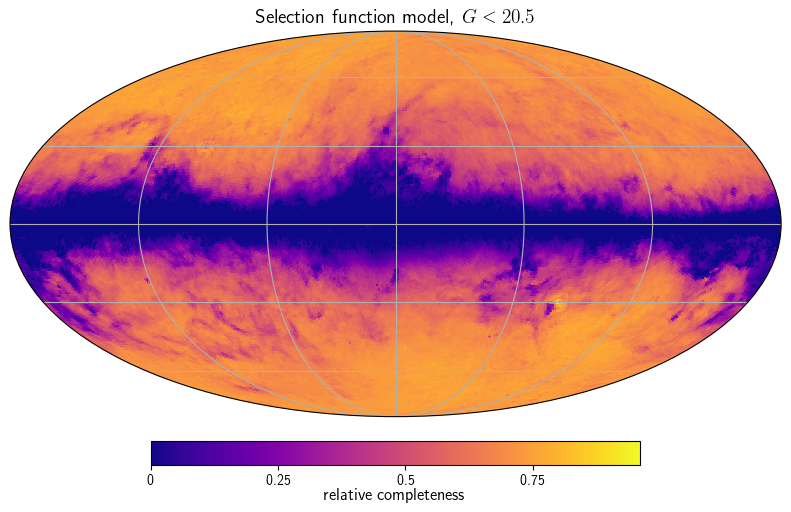

In [46]:
projview(map_selhi, title=rf"Selection function model, $G<{G_hi}$",
            unit=r"relative completeness", cmap=cmap_map, coord=['C', 'G'], 
            graticule=True,
            min=0, max=np.max(map_selhi),
            cbar_ticks=np.arange(0, max(map_selhi), 0.25)
            ) 

-1.6375e+30 0.9613862831064095


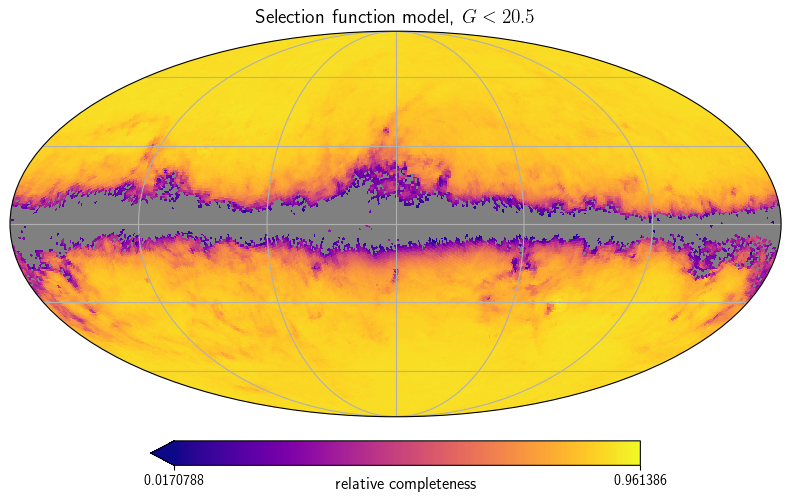

In [52]:
map_selhi_nonzero = map_selhi.copy()
min_nonzero = np.min(map_selhi_nonzero[map_selhi>0])
#map_selhi_nonzero[map_selhi==0] = min_nonzero/10
map_selhi_nonzero[map_selhi==0] = hp.UNSEEN
print(np.min(map_selhi_nonzero), np.max(map_selhi_nonzero))
projview(map_selhi_nonzero, title=rf"Selection function model, $G<{G_hi}$",
            unit=r"relative completeness", cmap=cmap_map, coord=['C', 'G'], 
            graticule=True,
            min=min_nonzero, max=np.max(map_selhi),
            #cbar_ticks=np.arange(0, max(map_selhi), 0.25),
            norm='log',
            ) 

In [36]:
tab_randhi = Table.read(fn_randhi)
N_randhi = len(tab_randhi)
print(f"Number of random sources: {N_randhi}")

Number of random sources: 12955802


In [37]:
pixel_indices_randhi = hp.ang2pix(NSIDE, tab_randhi['ra'], tab_randhi['dec'], lonlat=True)
map_randhi = np.bincount(pixel_indices_randhi, minlength=NPIX)

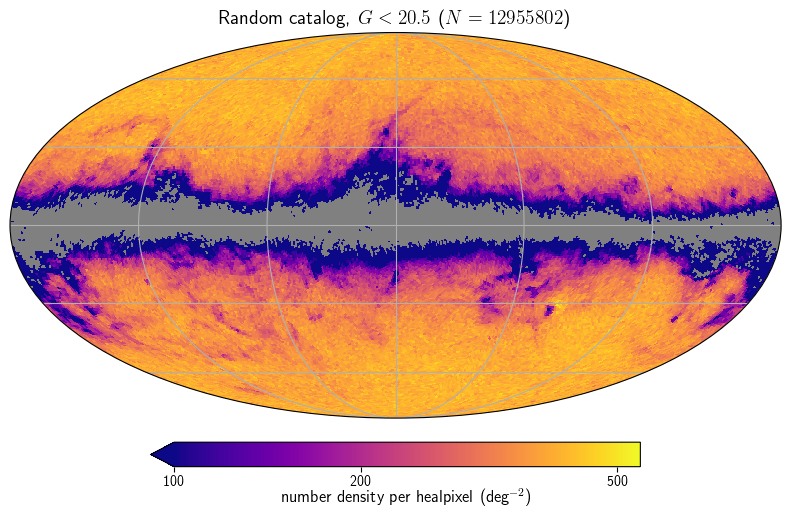

In [38]:
projview(map_randhi, title=rf"Random catalog, $G<{G_hi}$ ($N={N_randhi}$)",
            unit=r"number density per healpixel (deg$^{-2}$)", cmap=cmap_map, coord=['C', 'G'], 
            min=np.median(map_randhi)-fac_stdev*np.std(map_randhi), max=np.median(map_randhi)+fac_stdev*np.std(map_randhi), 
            norm='log', graticule=True,
            cbar_ticks=[100, 200, 500]) 

/state/partition1/job-41096212/ipykernel_3003222/1446555936.py:1: RuntimeWarning: invalid value encountered in divide
  map_randhi_corr = map_randhi/map_selhi


549.8817895866152
62.3727182040262


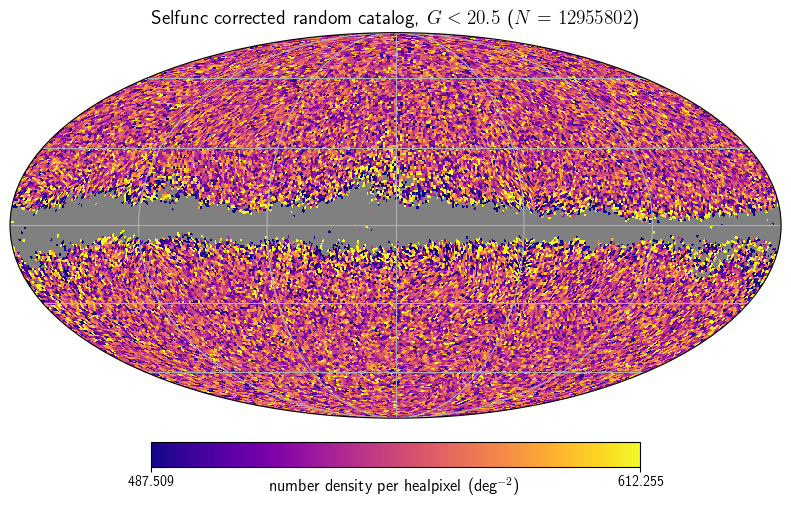

In [39]:
map_randhi_corr = map_randhi/map_selhi
i_notnan = ~np.isnan(map_randhi_corr)
print(np.median(map_randhi_corr[i_notnan]))
print(fac_stdev*np.std(map_randhi_corr[i_notnan]))
projview(map_randhi_corr, title=rf"Selfunc corrected random catalog, $G<{G_hi}$ ($N={N_randhi}$)",
            unit=r"number density per healpixel (deg$^{-2}$)", cmap=cmap_map, coord=['C', 'G'], 
            min=np.median(map_randhi_corr[i_notnan])-fac_stdev*np.std(map_randhi_corr[i_notnan]), 
            max=np.median(map_randhi_corr[i_notnan])+fac_stdev*np.std(map_randhi_corr[i_notnan]), 
            #norm='log', 
            graticule=True,
            #cbar_ticks=[100, 200, 500]
            ) 

# lets try a simple one 

In [68]:
NPIX = hp.nside2npix(NSIDE)
print(NPIX)
map_test = np.arange(NPIX)/NPIX

49152


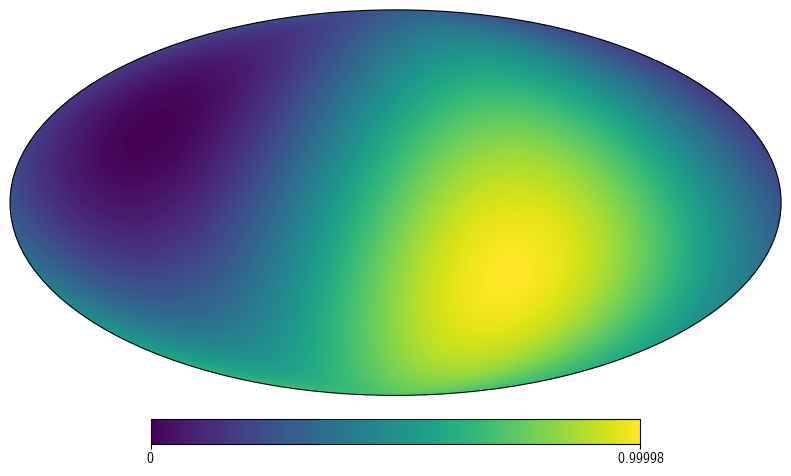

In [69]:
projview(map_test, coord=['C', 'G'])

In [70]:
fn_test = '../data/maps/selfunc_test.fits'
hp.write_map(fn_test, map_test, overwrite=True)

setting the output map dtype to [dtype('float64')]


In [63]:
fn_randtest = '../data/randoms/random_test.fits'
tab_randtest = Table.read(fn_randtest)
N_randtest = len(tab_randtest)
print(f"Number of random sources: {N_randtest}")

Number of random sources: 1294447


In [64]:
pixel_indices_randtest = hp.ang2pix(NSIDE, tab_randtest['ra'], tab_randtest['dec'], lonlat=True)
map_randtest = np.bincount(pixel_indices_randtest, minlength=NPIX)

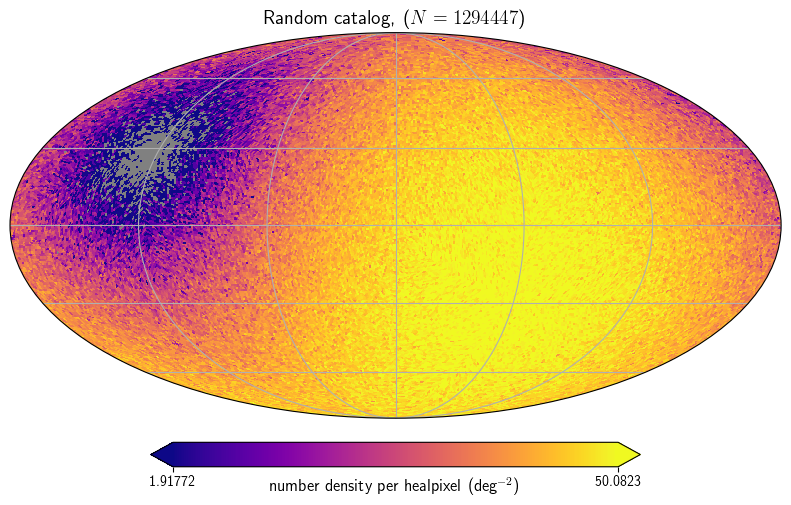

In [67]:
projview(map_randtest, title=rf"Random catalog, ($N={N_randtest}$)",
            unit=r"number density per healpixel (deg$^{-2}$)", cmap=cmap_map, coord=['C', 'G'], 
            min=np.median(map_randtest)-fac_stdev*np.std(map_randtest), 
            max=np.median(map_randtest)+fac_stdev*np.std(map_randtest), 
            norm='log', graticule=True,
            #cbar_ticks=[100, 200, 500]
        ) 

/state/partition1/job-41096212/ipykernel_3003222/3852576167.py:1: RuntimeWarning: invalid value encountered in divide
  map_randtest_corr = map_randtest/map_test


nan nan
52.1606248408184
28.945945499721603


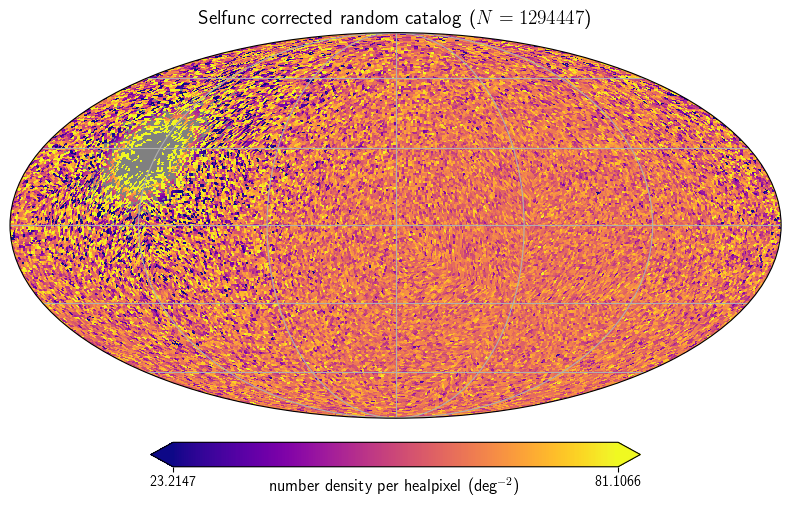

In [77]:
map_randtest_corr = map_randtest/map_test
print(np.min(map_randtest_corr), np.max(map_randtest_corr))
i_notnan = ~np.isnan(map_randtest_corr)
map_randtest_corr[~i_notnan] = hp.UNSEEN
print(np.median(map_randtest_corr[i_notnan]))
print(fac_stdev*np.std(map_randtest_corr[i_notnan]))
projview(map_randtest_corr, title=rf"Selfunc corrected random catalog ($N={N_randtest}$)",
            unit=r"number density per healpixel (deg$^{-2}$)", cmap=cmap_map, coord=['C', 'G'], 
            min=np.median(map_randtest_corr[i_notnan])-fac_stdev*np.std(map_randtest_corr[i_notnan]), 
            max=np.median(map_randtest_corr[i_notnan])+fac_stdev*np.std(map_randtest_corr[i_notnan]), 
            norm='log', 
            graticule=True,
            #cbar_ticks=[100, 200, 500]
            ) 

/state/partition1/job-41096212/ipykernel_3003222/1054146626.py:1: RuntimeWarning: invalid value encountered in divide
  map_randtest_corr = map_randtest/map_test


nan nan
52.1606248408184
28.945945499721603


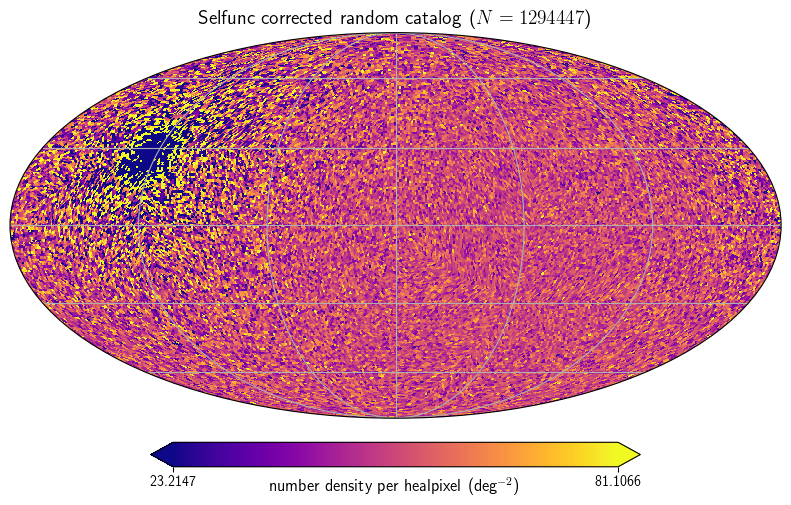

In [80]:
map_randtest_corr = map_randtest/map_test
print(np.min(map_randtest_corr), np.max(map_randtest_corr))
i_notnan = ~np.isnan(map_randtest_corr)
map_randtest_corr[~i_notnan] = hp.UNSEEN
print(np.median(map_randtest_corr[i_notnan]))
print(fac_stdev*np.std(map_randtest_corr[i_notnan]))
projview(map_randtest_corr, title=rf"Selfunc corrected random catalog ($N={N_randtest}$)",
            unit=r"number density per healpixel (deg$^{-2}$)", cmap=cmap_map, coord=['C', 'G'], 
            min=np.median(map_randtest_corr[i_notnan])-fac_stdev*np.std(map_randtest_corr[i_notnan]), 
            max=np.median(map_randtest_corr[i_notnan])+fac_stdev*np.std(map_randtest_corr[i_notnan]), 
            #norm='log', 
            graticule=True,
            #cbar_ticks=[100, 200, 500]
            ) 

In [86]:
len(map_randtest), np.sum(map_randtest==0)

(49152, 940)

(array([4.741e+03, 4.569e+03, 4.686e+03, 3.781e+03, 4.679e+03, 4.492e+03,
        3.794e+03, 4.681e+03, 4.459e+03, 3.189e+03, 3.060e+03, 1.866e+03,
        6.880e+02, 3.410e+02, 1.040e+02, 1.500e+01, 4.000e+00, 2.000e+00,
        1.000e+00]),
 array([ 0.        ,  4.68421053,  9.36842105, 14.05263158, 18.73684211,
        23.42105263, 28.10526316, 32.78947368, 37.47368421, 42.15789474,
        46.84210526, 51.52631579, 56.21052632, 60.89473684, 65.57894737,
        70.26315789, 74.94736842, 79.63157895, 84.31578947, 89.        ]),
 <BarContainer object of 19 artists>)

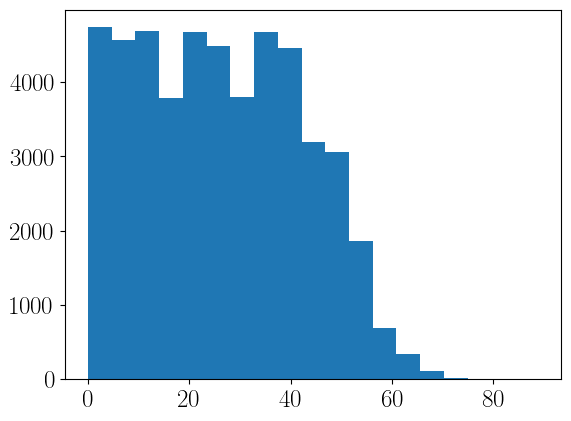

In [91]:
bins = np.linspace(0, np.max(map_randtest)+1, 20)
plt.hist(map_randtest, bins=bins)